In [159]:
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from imdb_api import imdbscraper

In [160]:
hbo = pd.read_csv('../data/hbo.csv')
hbo_comments = pd.read_csv('../comments/hbo_comments.csv')

In [161]:
hbo

,Unnamed: 0,channelId,videoId,videoTitle,publishTime,publishedAt,title_lowered,is_trailer
0,1,UCx-KWLTKlB83hDI6UKECtJQ,_zUMrdXxJJA,"Love, Lizzo | Official Trailer | HBO Max",2022-11-10T17:17:31Z,2022-11-10T17:17:31Z,"love, lizzo | official trailer | hbo max",True
1,2,UCx-KWLTKlB83hDI6UKECtJQ,DotnJ7tTA34,House of the Dragon | Official Trailer | HBO Max,2022-07-20T17:00:16Z,2022-07-20T17:00:16Z,house of the dragon | official trailer | hbo max,True
2,5,UCx-KWLTKlB83hDI6UKECtJQ,Gtl-6RCOl84,The Fallout | Official Trailer | HBO Max,2022-01-18T17:00:28Z,2022-01-18T17:00:28Z,the fallout | official trailer | hbo max,True
3,6,UCx-KWLTKlB83hDI6UKECtJQ,-ojckacr9EA,GARCIA! | Official Trailer | HBO MAX,2022-10-25T16:01:20Z,2022-10-25T16:01:20Z,garcia! | official trailer | hbo max,True
4,7,UCx-KWLTKlB83hDI6UKECtJQ,l3oWrNQo_Ng,Tokyo Vice | Official Trailer | HBO Max,2022-03-14T16:00:17Z,2022-03-14T16:00:17Z,tokyo vice | official trailer | hbo max,True
...,...,...,...,...,...,...,...,...
110,275,UCx-KWLTKlB83hDI6UKECtJQ,3FGAsgos8UE,gen:LOCK S2 | Official Trailer | HBO Max,2021-10-28T16:20:20Z,2021-10-28T16:20:20Z,gen:lock s2 | official trailer | hbo max,True
111,289,UCx-KWLTKlB83hDI6UKECtJQ,icKZQ9J37nQ,The Power of We: A Sesame Street Special | Off...,2020-10-15T17:31:15Z,2020-10-15T17:31:15Z,the power of we: a sesame street special | off...,True
112,308,UCx-KWLTKlB83hDI6UKECtJQ,66X4ujnzrZo,Perfect Life | Official Trailer | HBO Max,2021-01-11T16:00:09Z,2021-01-11T16:00:09Z,perfect life | official trailer | hbo max,True
113,329,UCx-KWLTKlB83hDI6UKECtJQ,CDAi0dP2Hvc,Arthur Hanlon Presents: Piano y Mujer II | Off...,2022-11-11T19:06:55Z,2022-11-11T19:06:55Z,arthur hanlon presents: piano y mujer ii | off...,True


In [5]:
hbo_comments.groupby('videoId').agg(count=('videoId', 'count'))

,count
videoId,
-ojckacr9EA,55
2c88uLr9whE,10
3FGAsgos8UE,228
3jL7u5BznRo,154
3sfQehgUUFQ,4509
...,...
ycI3odQwhE4,3088
z6LCD7nyD0s,1445
zRpHyvuJ__A,409


In [7]:
def sentiment_vader(sentence):

    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()

    sentiment_dict = sid_obj.polarity_scores(sentence)
    negative = sentiment_dict['neg']
    neutral = sentiment_dict['neu']
    positive = sentiment_dict['pos']
    compound = sentiment_dict['compound']

    if sentiment_dict['compound'] >= 0.05 :
        overall_sentiment = "Positive"

    elif sentiment_dict['compound'] <= - 0.05 :
        overall_sentiment = "Negative"

    else :
        overall_sentiment = "Neutral"
  
    return negative, neutral, positive, compound, overall_sentiment

In [28]:
hbo_comments.textOriginal.astype(str)[:10].apply(sentiment_vader)

0               (0.0, 1.0, 0.0, 0.0, Neutral)
1       (0.0, 0.417, 0.583, 0.6369, Positive)
2       (0.0, 0.435, 0.565, 0.7579, Positive)
3               (0.0, 1.0, 0.0, 0.0, Neutral)
4    (0.289, 0.467, 0.244, -0.2422, Negative)
5               (0.0, 1.0, 0.0, 0.0, Neutral)
6      (0.232, 0.53, 0.237, 0.0516, Positive)
7     (0.386, 0.175, 0.439, 0.0772, Positive)
8      (0.113, 0.887, 0.0, -0.1027, Negative)
9       (0.0, 0.815, 0.185, 0.3612, Positive)
Name: textOriginal, dtype: object

In [44]:
print(hbo_comments.textOriginal[6])

Promoting being overweight as a positive is just as much as a movie portraying a junkie and doing drugs is actually fun just terrible ban this junk


In [45]:
hbo_comments['sentiment'] = hbo_comments.textOriginal.astype(str).apply(sentiment_vader)

In [51]:
sentiment_map = {'Neutral': 0, 'Positive': 1, 'Negative': -1}
hbo_comments['sentiment_score'] = hbo_comments.sentiment.str[-1].map(sentiment_map)

In [75]:
hbo_comments

,Unnamed: 0,videoId,commentId,textOriginal,likeCount,publishedAt,sentiment,sentiment_score
0,0,_zUMrdXxJJA,UgxuBJ5HLIdJppug-lh4AaABAg,Check out what else is new on HBO Max here: ht...,6,2022-11-10T17:20:39Z,"(0.0, 1.0, 0.0, 0.0, Neutral)",0
1,1,_zUMrdXxJJA,UgwxuweCUMWnjLhkYgR4AaABAg,lizzo is the best,0,2022-12-03T20:44:28Z,"(0.0, 0.417, 0.583, 0.6369, Positive)",1
2,2,_zUMrdXxJJA,Ugyzw9HGserF3Ro5sbh4AaABAg,i love you lizz im y...,0,2022-12-03T20:43:19Z,"(0.0, 0.435, 0.565, 0.7579, Positive)",1
3,3,_zUMrdXxJJA,UgzHh4GVXvL_CHre_vl4AaABAg,EWWW,0,2022-12-01T09:55:42Z,"(0.0, 1.0, 0.0, 0.0, Neutral)",0
4,4,_zUMrdXxJJA,UgykD_26yQNFzbjVwtd4AaABAg,Lookin all oppressed with her HBO special. Poo...,0,2022-12-01T05:56:29Z,"(0.289, 0.467, 0.244, -0.2422, Negative)",-1
...,...,...,...,...,...,...,...,...
125673,125673,fLa_rPyz8Iw,UgxwzjXnu1AtzR01Ji54AaABAg,Thriisome!!! There you go..,44,2021-01-26T18:09:44Z,"(0.0, 1.0, 0.0, 0.0, Neutral)",0
125674,125674,fLa_rPyz8Iw,UgwJN3W_2Z4cmDQDQwJ4AaABAg,Looks cool! Gonna watch it!,3,2021-01-26T18:08:05Z,"(0.0, 0.581, 0.419, 0.4374, Positive)",1
125675,125675,fLa_rPyz8Iw,Ugz4WPu0mAP1nTc3QoB4AaABAg,RESTORE THE SNYDERVERSE:\n\n❖ Zack Snyder's Ju...,12,2021-01-26T18:07:15Z,"(0.069, 0.833, 0.098, 0.2103, Positive)",1
125676,125676,fLa_rPyz8Iw,UgyyfnTmklEONsipA3p4AaABAg,Awesome,1,2021-01-26T18:02:56Z,"(0.0, 0.0, 1.0, 0.6249, Positive)",1


In [77]:
agg_comments = hbo_comments.groupby('videoId').agg(
    score=('sentiment_score', 'mean'),
    count=('commentId', 'count')
).reset_index()

In [78]:
agg_comments

,videoId,score,count
0,-ojckacr9EA,0.400000,55
1,2c88uLr9whE,0.500000,10
2,3FGAsgos8UE,0.228070,228
3,3jL7u5BznRo,-0.032468,154
4,3sfQehgUUFQ,0.229763,4509
...,...,...,...
109,ycI3odQwhE4,0.247085,3088
110,z6LCD7nyD0s,0.242215,1445
111,zRpHyvuJ__A,0.146699,409
112,zpUTDuGIddQ,-0.031026,419


In [81]:
df = hbo.merge(agg_comments, on='videoId')

(array([ 0.,  0.,  4., 11., 20., 16., 21., 17., 11.,  7.,  3.,  2.,  1.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.]),
 array([1.00000000e+00, 2.21221629e+00, 4.89390092e+00, 1.08263673e+01,
        2.39502662e+01, 5.29831691e+01, 1.17210230e+02, 2.59294380e+02,
        5.73615251e+02, 1.26896100e+03, 2.80721620e+03, 6.21016942e+03,
        1.37382380e+04, 3.03919538e+04, 6.72335754e+04, 1.48735211e+05,
        3.29034456e+05, 7.27895384e+05, 1.61026203e+06, 3.56224789e+06,
        7.88046282e+06, 1.74332882e+07, 3.85662042e+07, 8.53167852e+07,
        1.88739182e+08, 4.17531894e+08, 9.23670857e+08, 2.04335972e+09,
        4.52035366e+09, 1.00000000e+10]),
 <BarContainer object of 29 artists>)

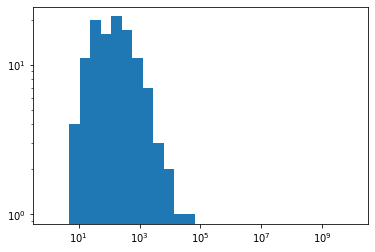

In [114]:
fig, ax = plt.subplots()
bins = 10**(np.linspace(0,10,30))

ax.set_xscale('log')
ax.hist(df['count'], bins=bins, log=True)

In [117]:
mapper = pd.read_csv('../hbo_match.csv', delimiter=';')

In [118]:
imdb = pd.read_csv('../imdb/title.basics.tsv', delimiter='\t')

<ipython-input-118-2e214b0a7f5a>:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  imdb = pd.read_csv('../imdb/title.basics.tsv', delimiter='\t')


In [126]:
ratings = pd.read_csv('../imdb/title.ratings.tsv', delimiter='\t')

In [128]:
df = hbo.merge(agg_comments, on='videoId')
df = df.merge(mapper, left_on='videoId', right_on='youtube_id')
df = df.merge(imdb, left_on='Imdb_id', right_on='tconst')
df = df.merge(ratings, on='tconst')

In [132]:
df

,Unnamed: 0,channelId,videoId,videoTitle,publishTime,publishedAt,title_lowered,is_trailer,score,count,...,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,1,UCx-KWLTKlB83hDI6UKECtJQ,_zUMrdXxJJA,"Love, Lizzo | Official Trailer | HBO Max",2022-11-10T17:17:31Z,2022-11-10T17:17:31Z,"love, lizzo | official trailer | hbo max",True,0.274194,62,...,movie,Locked Down,Locked Down,0,2021,\N,118,"Comedy,Crime,Romance",5.2,12402
1,90,UCx-KWLTKlB83hDI6UKECtJQ,mepeWor5JPk,Locked Down | Official Trailer | HBO Max,2021-01-05T17:00:42Z,2021-01-05T17:00:42Z,locked down | official trailer | hbo max,True,0.205776,554,...,movie,Locked Down,Locked Down,0,2021,\N,118,"Comedy,Crime,Romance",5.2,12402
2,2,UCx-KWLTKlB83hDI6UKECtJQ,DotnJ7tTA34,House of the Dragon | Official Trailer | HBO Max,2022-07-20T17:00:16Z,2022-07-20T17:00:16Z,house of the dragon | official trailer | hbo max,True,0.177250,11024,...,tvSeries,House of the Dragon,House of the Dragon,0,2022,\N,\N,"Action,Adventure,Drama",8.5,264406
3,5,UCx-KWLTKlB83hDI6UKECtJQ,Gtl-6RCOl84,The Fallout | Official Trailer | HBO Max,2022-01-18T17:00:28Z,2022-01-18T17:00:28Z,the fallout | official trailer | hbo max,True,0.255626,1111,...,movie,The Fallout,The Fallout,0,2021,\N,96,Drama,7.0,17602
4,6,UCx-KWLTKlB83hDI6UKECtJQ,-ojckacr9EA,GARCIA! | Official Trailer | HBO MAX,2022-10-25T16:01:20Z,2022-10-25T16:01:20Z,garcia! | official trailer | hbo max,True,0.400000,55,...,tvSeries,García!,¡García!,0,2022,2022,60,"Action,Adventure,Drama",6.0,429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,229,UCx-KWLTKlB83hDI6UKECtJQ,7GRDLX3a-IE,No Sudden Move | Official Trailer | HBO Max,2021-06-07T17:00:50Z,2021-06-07T17:00:50Z,no sudden move | official trailer | hbo max,True,0.309589,365,...,movie,No Sudden Move,No Sudden Move,0,2021,\N,115,"Crime,Drama,Mystery",6.4,35258
69,239,UCx-KWLTKlB83hDI6UKECtJQ,dhJrnNdH-aw,15 Minutes of Shame | Official Trailer | HBO Max,2021-09-21T17:00:03Z,2021-09-21T17:00:03Z,15 minutes of shame | official trailer | hbo max,True,0.033784,148,...,movie,15 Minutes of Shame,15 Minutes of Shame,0,2021,\N,85,Documentary,6.7,767
70,240,UCx-KWLTKlB83hDI6UKECtJQ,Quwc1ePt6_0,Homeschool Musical: Class of 2020 | Official T...,2020-12-01T19:02:53Z,2020-12-01T19:02:53Z,homeschool musical: class of 2020 | official t...,True,0.571429,21,...,tvSpecial,Homeschool Musical: Class of 2020,Homeschool Musical: Class of 2020,0,2020,\N,\N,\N,6.0,24
71,275,UCx-KWLTKlB83hDI6UKECtJQ,3FGAsgos8UE,gen:LOCK S2 | Official Trailer | HBO Max,2021-10-28T16:20:20Z,2021-10-28T16:20:20Z,gen:lock s2 | official trailer | hbo max,True,0.228070,228,...,tvSeries,Gen: Lock,gen:LOCK,0,2018,\N,30,"Action,Adventure,Animation",7.3,1607


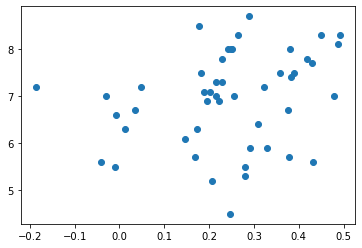

In [145]:
fig, ax = plt.subplots()
mask = df['count'] > 100
ax.scatter(df[mask]['score'], df[mask].averageRating)

In [146]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(df[mask]['score'].to_numpy().reshape(-1, 1), df[mask].averageRating.to_numpy())
lr.score(df[mask]['score'].to_numpy().reshape(-1, 1), df[mask].averageRating.to_numpy())

0.0706930294577014

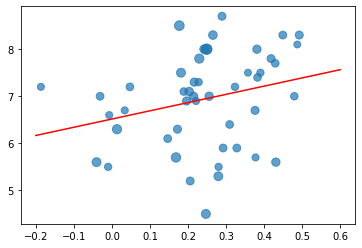

In [154]:
fig, ax = plt.subplots()
ax.scatter(df[mask]['score'], df[mask].averageRating, s=np.log(df[mask]['count'])*10, alpha=.7)
x = np.linspace(-.2, .6, 100000).reshape(-1, 1)
y = lr.predict(x)
ax.plot(x, y, color='red')